In [3]:
!pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [5]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Tesla.csv - Tesla.csv.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [9]:
df.head()

Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001

In [10]:
df.tail()

Date        Open        High         Low       Close   Volume  \
1687  3/13/2017  244.820007  246.850006  242.779999  246.169998  3010700   
1688  3/14/2017  246.110001  258.119995  246.020004  258.000000  7575500   
1689  3/15/2017  257.000000  261.000000  254.270004  255.729996  4816600   
1690  3/16/2017  262.399994  265.750000  259.059998  262.049988  7100400   
1691  3/17/2017  264.000000  265.329987  261.200012  261.500000  6475900   

       Adj Close  
1687  246.169998  
1688  258.000000  
1689  255.729996  
1690  262.049988  
1691  261.500000

In [11]:
df.sample(6)

Date        Open        High         Low       Close   Volume  \
1682    3/6/2017  247.910004  251.699997  247.509995  251.210007  3351200   
1594  10/26/2016  201.000000  203.190002  200.100006  202.240005  5632800   
1106  11/18/2014  255.860001  259.989990  255.509995  257.700012  4473000   
1007   6/30/2014  239.550003  244.490005  239.000000  240.059998  4828600   
1344  10/29/2015  211.750000  213.750000  210.639999  211.630005  1805000   
430    3/13/2012   36.509998   36.590000   35.500000   36.090000  1001600   

       Adj Close  
1682  251.210007  
1594  202.240005  
1106  257.700012  
1007  240.059998  
1344  211.630005  
430    36.090000

In [12]:
df.describe()

Open         High          Low        Close        Volume  \
count  1692.000000  1692.000000  1692.000000  1692.000000  1.692000e+03   
mean    132.441572   134.769698   129.996223   132.428658  4.270741e+06   
std      94.309923    95.694914    92.855227    94.313187  4.295971e+06   
min      16.139999    16.629999    14.980000    15.800000  1.185000e+05   
25%      30.000000    30.650000    29.215000    29.884999  1.194350e+06   
50%     156.334999   162.370002   153.150002   158.160004  3.180700e+06   
75%     220.557495   224.099999   217.119999   220.022503  5.662100e+06   
max     287.670013   291.420013   280.399994   286.040009  3.716390e+07   

         Adj Close  
count  1692.000000  
mean    132.428658  
std      94.313187  
min      15.800000  
25%      29.884999  
50%     158.160004  
75%     220.022503  
max     286.040009

In [14]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [15]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [16]:
df.var()

C:\Users\HP\AppData\Local\Temp\ipykernel_2068\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Open         8.894362e+03
High         9.157517e+03
Low          8.622093e+03
Close        8.894977e+03
Volume       1.845537e+13
Adj Close    8.894977e+03
dtype: float64

In [17]:
df.shape

(1692, 7)

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

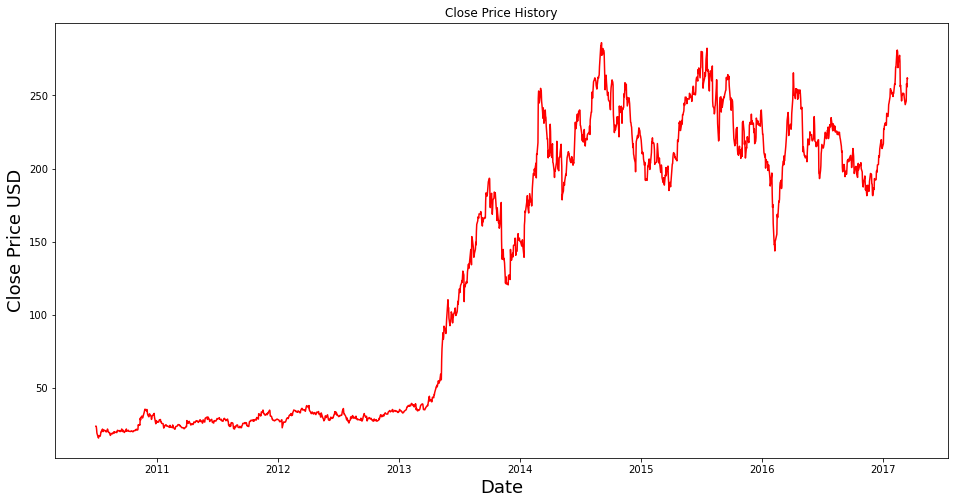

In [19]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

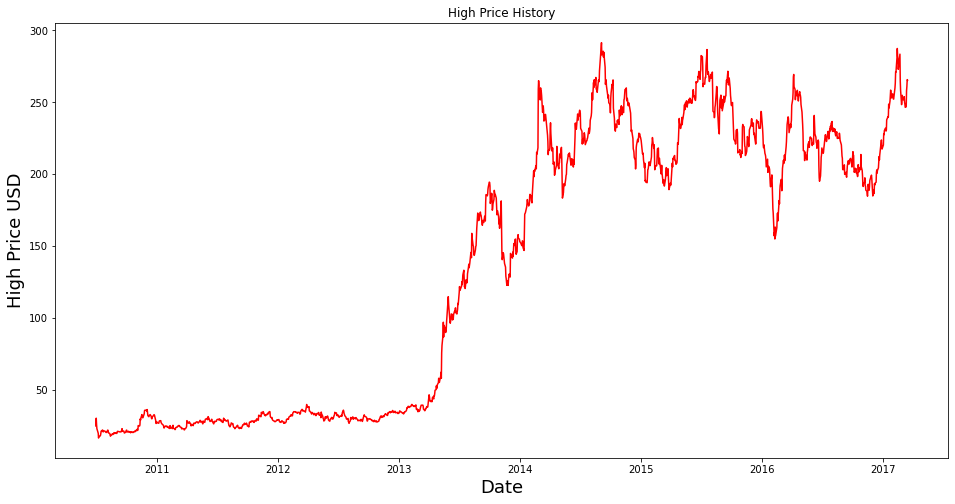

In [20]:
plt.figure(figsize=(16,8))
plt.title('High Price History')
plt.plot(df['High'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('High Price USD', fontsize = 18)
plt.show()

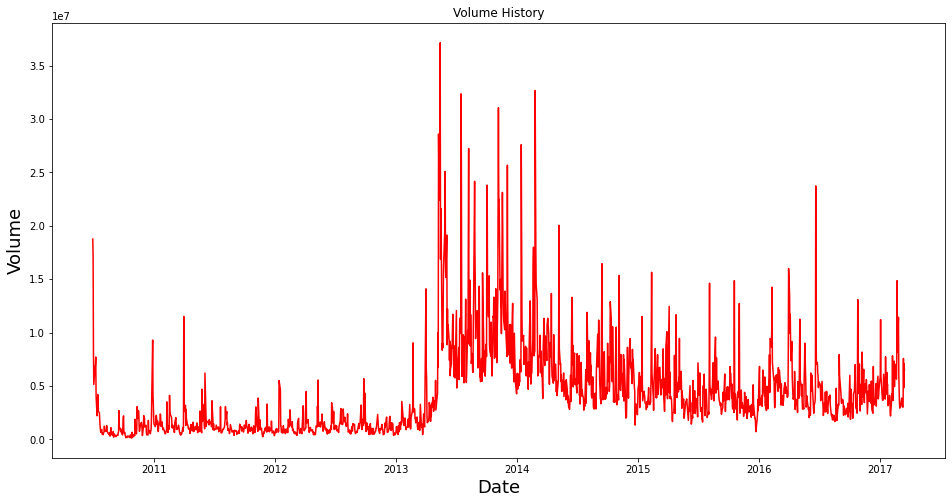

In [21]:
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(df['Volume'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize = 18)
plt.show()

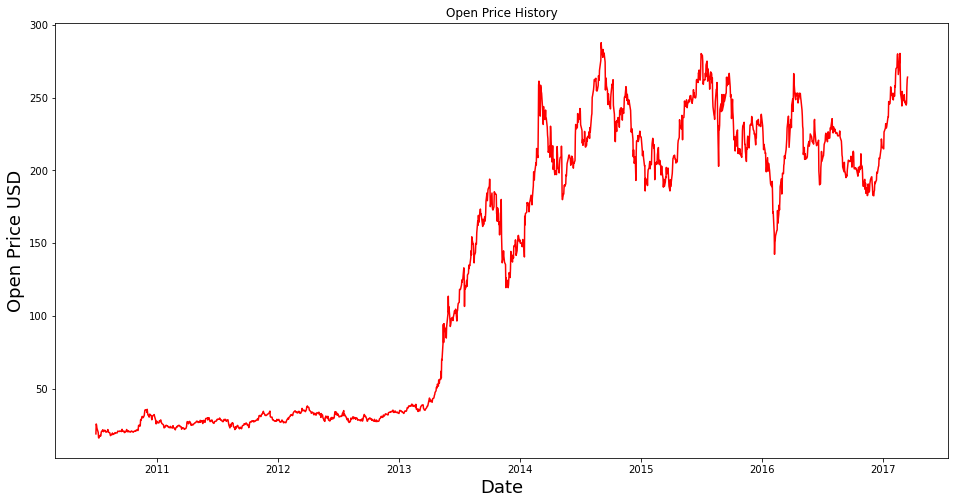

In [22]:
plt.figure(figsize=(16,8))
plt.title('Open Price History')
plt.plot(df['Open'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD', fontsize = 18)
plt.show()

In [23]:
data = df.filter(['Close'])
dataset = data.values 
training_data_len = math.ceil(len(dataset)*.8)  

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [25]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [26]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

In [28]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 26s 17ms/step - loss: 0.0028
Epoch 2/10
1294/1294 [==============================] - 28s 22ms/step - loss: 0.0018
Epoch 3/10
1294/1294 [==============================] - 27s 21ms/step - loss: 9.7725e-04
Epoch 4/10
1294/1294 [==============================] - 26s 20ms/step - loss: 9.4107e-04
Epoch 5/10
1294/1294 [==============================] - 26s 20ms/step - loss: 6.1516e-04
Epoch 6/10
1294/1294 [==============================] - 25s 19ms/step - loss: 6.9488e-04
Epoch 7/10
1294/1294 [==============================] - 24s 19ms/step - loss: 5.8553e-04
Epoch 8/10
1294/1294 [==============================] - 24s 19ms/step - loss: 6.1710e-04
Epoch 9/10
1294/1294 [==============================] - 25s 19ms/step - loss: 6.0948e-04
Epoch 10/10
1294/1294 [==============================] - 25s 19ms/step - loss: 4.9859e-04


In [31]:
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [32]:
x_test = np.array(x_test)

In [33]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [34]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 14ms/step


In [35]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.9981333296158472

C:\Users\HP\AppData\Local\Temp\ipykernel_2068\336307139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


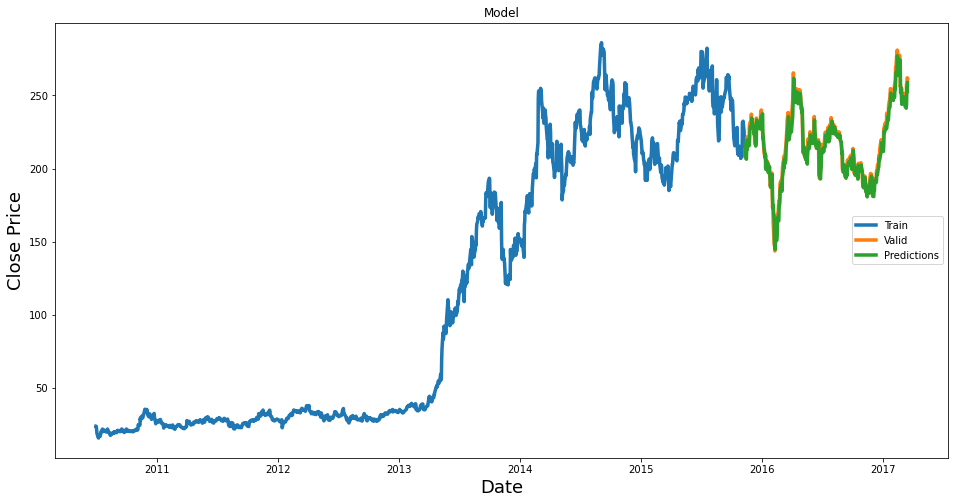

In [36]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='center right')

In [37]:
valid

Close  Predictions
Date                               
2015-11-12  212.940002   217.511719
2015-11-13  207.190002   211.785400
2015-11-16  214.309998   206.396530
2015-11-17  214.000000   213.628616
2015-11-18  221.070007   212.973969
...                ...          ...
2017-03-13  246.169998   241.273804
2017-03-14  258.000000   243.948547
2017-03-15  255.729996   255.906784
2017-03-16  262.049988   252.320618
2017-03-17  261.500000   258.763245

[338 rows x 2 columns]

# THANK YOU